### 1.목표
- 버섯의 특징을 활용해 독/식용 버섯인지 예측하는 이진분류 모델 만들어보자
- DecisionTree 시각화 & 과대 적합 속성 제어
- 특성 중요도 확인

In [1]:
# 환경셋팅
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DecisionTree 분류 불러오기
from sklearn.tree import DecisionTreeClassifier

# train,test 분류, 랜덤 샘플링
from sklearn.model_selection import train_test_split

# 정확도 측정 모델
from sklearn.metrics import accuracy_score



### 2.데이터 불러오기

In [2]:
# 판다스 df 옵션 설정
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("./data/mushroom.csv", decimal=",")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [4]:
data.shape
# 행 : 8124
# 열 : 23 -> label(1) + feature(22)

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 3.데이터 전처리 및 탐색

In [7]:
# 문제(특성)와 답(label) 분리
# 열 인덱싱
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [8]:
# 분리된 데이터 확인
print("문제 데이터 : ",X.shape)
print("정답 데이터 : ",y.shape)


문제 데이터 :  (8124, 22)
정답 데이터 :  (8124,)


In [9]:
# 기술 통계량
# 현재 데이터가 문자열(범주형) 평균, 중앙 뽑기 어려운 상황

X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
# y값, 식용/ 독버섯 몇개씩 들어있는지 확인
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

#### 3.2 인코딩
- 머신러닝은 숫자를 학습할 수 있음
- 문자열 > 숫자 형태 변형 : encoding
- encoding 방식
- 1 ) 레이블 인코딩
    - 데이터의 크고 작음의 의미가 있을 때
- 2 ) 원핫 인코딩
    - 데이터의 크고 작음의 의미가 없을 때, 그 자체로 의미를 가질 때

In [11]:
# 원핫 인코딩
# pd.get_dumies(대상) -> one hot encoding 진행하는 함수
X_oh= pd.get_dummies(X)

##### 추가 설명) 레이블 인코딩 예시

In [12]:
X['habitat'].unique()
habitat_dic = {
    "u":2,
    "g":1,
    "m":3,
    "d":4,
    "p":5,
    "w":7,
    "l":6,
}

# 맵핑
X['habitat'].map(habitat_dic)


0       2
1       1
2       3
3       2
4       1
       ..
8119    6
8120    6
8121    6
8122    6
8123    6
Name: habitat, Length: 8124, dtype: int64

In [13]:
X_oh
# tree 모델 : 특성 1개를 기준으로 질문을 던지고, 반복적으로 질문하며 학습 진행

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

### train,test분리

In [14]:
# 테스트 사이즈 : 30퍼
# 랜덤 샘플링 고정 값 -> 0
X_train,X_test,y_train,y_test = train_test_split(X_oh,y,test_size=0.3, random_state=0)

In [15]:
# 크기 확인
print("훈련 문제 데이터 :",X_train.shape)
print("훈련 정답 데이터 :",y_train.shape)
print("테스트 문제 데이터 : ",X_test.shape)
print("테스트 정답 데이터 : ",y_test.shape)


훈련 문제 데이터 : (5686, 117)
훈련 정답 데이터 : (5686,)
테스트 문제 데이터 :  (2438, 117)
테스트 정답 데이터 :  (2438,)


In [16]:
# test_size 0.2 => e    3347, 3152
# test_size 0.25 => 3136, 2957
# test_size 0.3 => 2936, 2750
y_train.value_counts()

e    2936
p    2750
Name: poisonous, dtype: int64

### 4. 모델링


#### 4.1 모델 생성 및 학습

In [17]:
# 객체 생성
tree_model = DecisionTreeClassifier()

# 트리 모델은 과대 적합에 걸리기 쉬운 모델
# hyperparameter 값의 기본값이 제한적이지 않다.
# 데이터를 받으면서 random 하게 섞는 작업이 진행 된다. 
# > 크게 차이나진 않지만 데이터를 보는 순서에 따라 모델의 규칙 생성이 미묘하게 변할 수 있다.


In [18]:
# 학습
# 학습용 문제, 학습용 답
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
# 예측
# 새로운 문제
# predict(X_test)

pre = tree_model.predict(X_test)
pre

array(['p', 'e', 'e', ..., 'p', 'p', 'p'], dtype=object)

In [20]:
# 원본 특성을 입력(웹, 앱) > PYTHON 코드로 넘기기(flask) > 전처리 
# > 모델 연결 > 예측 결과 > 웹, 앱 전달

In [21]:
# 성능 평가 진행

# model.score(문제, 답) > 정확도 출력
test_acc = tree_model.score(X_test,y_test) # 100%

print(test_acc)


1.0


#### 4.2 교차검증
- 개념 : 일반화 성능 측정하는 방법 -> 모든(어떤) 데이터에 대해 모델이 얼마나 잘 맞추는지 평가하는 방법
- 한번만 평가 하는 것 보다는 여러번 평가하는 것이 안정적이다.
- 방법론 : 검증용 데이터 셋을 여러겹 나눠서 평가하는 방법
- 모델을 정의하고 학습하기 전에 정확도가 어느정도 인지 확인할 때도 사용 가능
  

In [22]:
# 교차 검증 도구 sklearn에서 제공
from sklearn.model_selection import cross_val_score

# estimator : 예측기 -> model
# 교차 검증 사용하는 데이터 : train
# cv = cross validation -> 검증 데이터 개수 지정
result = cross_val_score(tree_model,X_train, y_train, cv=5)
print(result)
print(result.mean())

# 여러 개의 검증(테스트) 데이터가 들어와도 성능이 일반적으로 높게 나온다
# 현재 과대 적합을 제어하진 않았지만 일반화 모델이라 정의할 수 있다
# 예측하기 쉬운 데이터를 사용하고 있기 때문에 많은 작업이 필요 없는 상태

[1.         1.         1.         1.         0.99912049]
0.9998240985048372


### 5.특성 선택
- tree_model의 특성 중요도 확인
- 클래스를 분류하기 위해서 어떤 질문(특성)을 중요하게 여겼을 까?

In [23]:
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02761782e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10475831e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.11012008e-03, 0.00000000e+00,
       0.00000000e+00, 1.04011524e-02, 0.00000000e+00, 6.24704267e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.87982024e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69465645e-01, 0.00000000e+00, 0.00000000e+00,
      

In [24]:
# 특성 중요도 쉽게 확인
# pandas 객체 형식으로 바꿔서 보겠다

import_df = pd.DataFrame(fi, index=X_oh.columns)

# 높은 중요도를 가진 컬럼부터 확인 > 정렬하기
import_df.sort_values(by=0,ascending=False).head(10)

# 해당 특성을 기준으로 분리 했을 때의 불순도 파악 > 지니불순도
# 불순도가 낮게 출력되는 특성을 기준으로 제일 먼저 질문을 한다.

,0
odor_n,0.624704
stalk-root_c,0.169466
stalk-surface-below-ring_y,0.118472
spore-print-color_r,0.034145
spore-print-color_u,0.023820
odor_l,0.010401
odor_a,0.009110
population_y,0.005668
cap-surface_g,0.002105
population_c,0.001388


### 6.시각화
- tree 모델 학습 현황 시각화
- graphviz 시각화 도구 사용


In [25]:
!pip install graphviz

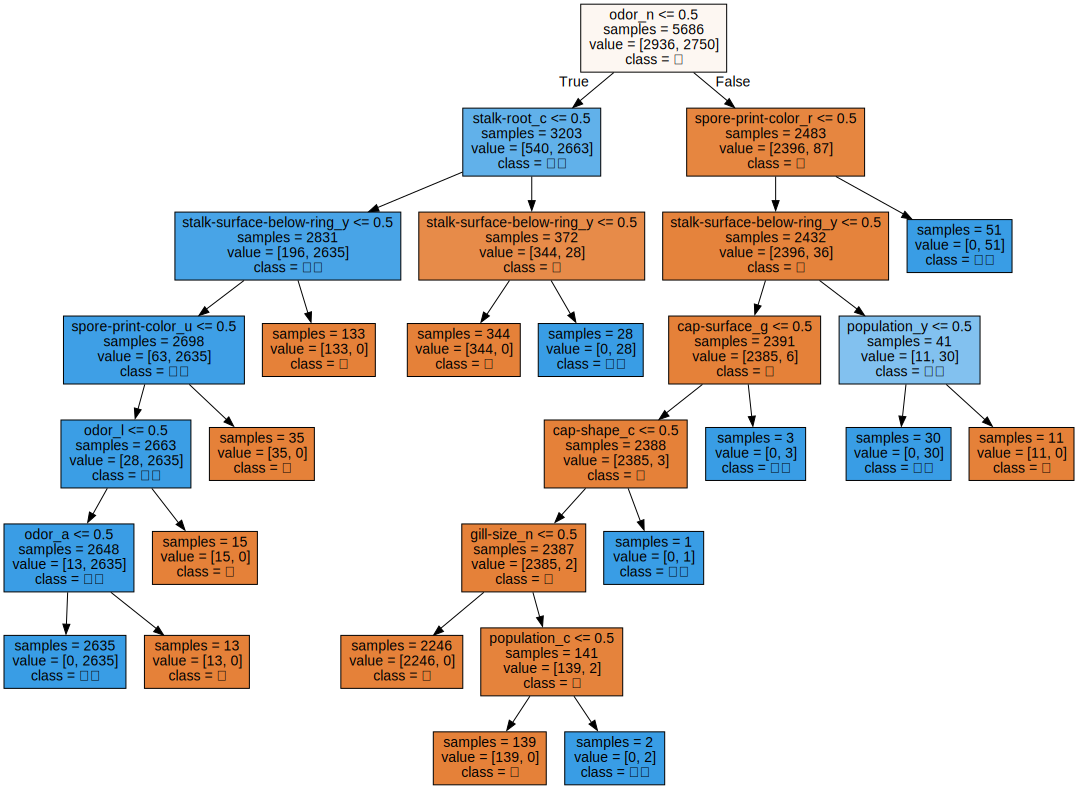

In [26]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

with open('./tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#### 6.1 과대적합 제어 후 시각화 확인

In [36]:
# 모델의 복잡도 제어 : 모델 안에 하이퍼 파라미터 총 4개

# 사전 가지치기 > 깊이 제어

# max_depth 
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [37]:
# 교차 검증
cross_val_score(tree_model2, X_train, y_train, cv=5)


array([0.98594025, 0.98328936, 0.9885664 , 0.98504837, 0.98680739])

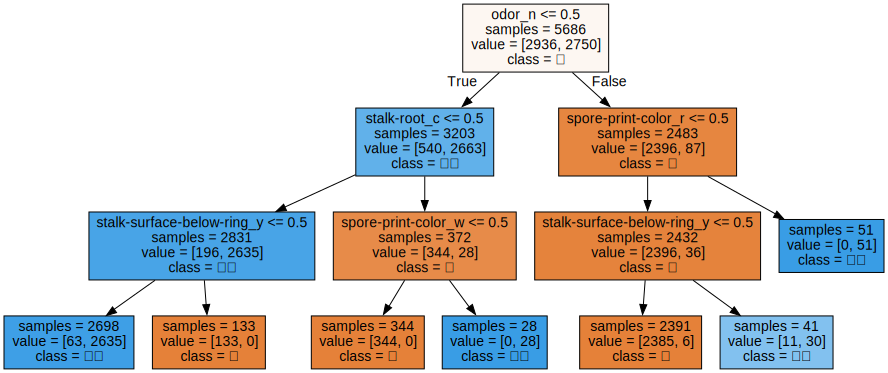

In [38]:
export_graphviz(tree_model2, out_file='tree2.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

with open('./tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [31]:
# 현재 데이터 기준으로는 과대적합 제어 필요가 없다.